 
<img src="http://www.australianwildlife.org/media/66803/tammar-wallaby.jpg" alt="Drawing" style="width: 500px;"/>

# Macropus eugenii - Klokan dama 
## Ricky Nencini

### Vědecká klasifikace

<pre>

|..      |..          |
|--------|------------|
|Říše    |Živočichové |
|Kmen    |Strunatci   |
|Podkmen |Obratlovci  |
|Třída   |Savci       |
|Podtřída|Vačnatci    |
|Řád     |Dvojitozubci|
|Čeleď   |Klokanovití |
|Rod     |Klokan      |

</pre>
<center>
zdroj: http://www.ensembl.org/Macropus_eugenii/Info/Annotation
</center>





Jedná se o nejmenšího vačnatce z rodu klokanů. Dosahuje 52-68 cm a váží 7 až 9 kg. Jedná se o býložravce, který se dožívá až 10ti let. Fotka s člověkem pro představu jak je tento klokan malý.
![klokan](http://www.zooborns.com/.a/6a010535647bf3970b014e8a526242970d-500wi)

Klokan duma se vyskytuje především v jižní a západní Austrálii
![Vyskyt](https://upload.wikimedia.org/wikipedia/commons/c/c8/Tammar_Wallaby_area.png)
Dříve byl rozšířen hojně v jižní a jihozápadní Austrálii a na mnohých ostrovech, také na Novém Zélandu, ale na spostě míst téměř vyhynul či vyhynul.

Pro Australany byli kolani obecně zdrojem obživy. V 60. až 80. letech minulého století se klokaní maso ve velkém vyváželo a vyráběly se z něj především konzervy pro psy. Dnes se rozšířila obliba klokaního masa mezi lidmi.

Dokonce byl tak oblíbený, že internetový obchod https://www.skullsunlimited.com nabízel kostru klokana dumy, bohužel již není v obchodě dostupná
![Kostra](https://www.skullsunlimited.com/userfiles/image/variants_large_6580.jpg)

### Informace o genomu ze stránek autora genomu
<p>
<left><table align="left">
<tr>
<td><b>Párů bazí</b></td><td>2,549,429,531</td>
</tr>
<tr>
<td><b>Vyřešení genomu</b></td><td>červen 2009</td>
</tr>
<tr>
<td><b>Kódujících genů</b></td><td>	15,290</td>
</tr>
<tr>
<td><b>Nekódujících genů </b></td><td>	1,472</td>
</tr>
<tr>
<td><b>Small non coding genes	</b></td><td>1,430</td>
</tr>
<tr>
<td><b>Misc non coding genes</b></td><td>	42</td>
</tr>
<tr>
<td><b>Pseudogenů</b></td><td>	1,496</td>
</tr>
<tr>
<td><b>Gene transcripts</b></td><td>	18,310</td>
</tr>
</table>
</left>
</p>

<center>
zdroj: http://www.ensembl.org/Macropus_eugenii/Info/Annotation
</center>


## Analýza genomu

Prvně jsem si rozdělil data na dva menší soubory, které jsem později použil.

In [10]:
!cat Macropus.gtf | grep -E "\s+gene\s+" > klokan_gen.gtf
!cat Macropus.gtf | grep -E "\s+transcript\s+" > klokan_transkript.gtf
!cat Macropus.gtf | grep -E "\s+exon\s+" > klokan_exon.gtf

Naimportoval jsem si důležité knihovny.

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import pylab as pl
import re
%matplotlib inline

Vytvořil jsem si 3 hlavní tabulky, se kterými jsem dále pracoval.

In [43]:
genes=pd.read_table('klokan_gen.gtf', header=None, dtype={0:np.object})
klokan=pd.read_table('klokan.gtf', header=None, dtype={0:np.object})
exons=pd.read_table('klokan_exon.gtf', header=None, dtype={0:np.object})

Pojmenoval jsem jednotlivé sloupce.

In [44]:
klokan.columns = ["Chromozom", "Zdroj", "Druh", "Start", "Konec", "Score", "Retezec", "Frame", "Vlastnosti"]
genes.columns = ["Chromozom", "Zdroj", "Druh", "Start", "Konec", "Score", "Retezec", "Frame", "Vlastnosti"]
exons.columns = ["Chromozom", "Zdroj", "Druh", "Start", "Konec", "Score", "Retezec", "Frame", "Vlastnosti"]

Takto poté vypadaly výsledné tabulky, které se lišily jaké druhy jsou ve třetím sloupci.

In [27]:
klokan.head()

,Chromozom,Zdroj,Druh,Start,Konec,Score,Retezec,Frame,Vlastnosti
482733,Scaffold615051,ensembl,transcript,161,253,.,-,.,"gene_id ""ENSMEUG00000017635""; gene_version ""1""..."
482734,Scaffold615051,ensembl,exon,161,253,.,-,.,"gene_id ""ENSMEUG00000017635""; gene_version ""1""..."
482735,Scaffold615314,ensembl,gene,138,230,.,-,.,"gene_id ""ENSMEUG00000017382""; gene_version ""1""..."
482736,Scaffold615314,ensembl,transcript,138,230,.,-,.,"gene_id ""ENSMEUG00000017382""; gene_version ""1""..."
482737,Scaffold615314,ensembl,exon,138,230,.,-,.,"gene_id ""ENSMEUG00000017382""; gene_version ""1""..."


Pro informaci jsem zjistil, jaké všechny druhy se ve třetím sloupci nacházejí, abych neopomenul nějakou důležitou informaci.

In [20]:
klokan["feature"].unique()

array(['gene', 'transcript', 'exon', 'CDS', 'start_codon', 'stop_codon',
       'Selenocysteine'], dtype=object)

## Počet chromozomů

Na stránkách http://www.ensembl.org, tedy na stránkách, ze kterých pochází data o genomu jsem si zjistil informace o .gtf formátu. Zde jsem zjistil, že první sloupec dat obsahuje název chromozomu či "scaffoldu". Dodatečná informace byla, že chromozomy mohou a nemusí být označeny <i>chr</i>.

Zkusil jsem tedy nejdřiv spočítat kolik existuje různých názvů které jsou v prvním sloupci a poté jsem zkusil, zda-li se v některém řádku v prvním sloupci nevyskytuje <i>chr</i>.

In [5]:
!cut -f1  klokan.gtf | uniq -c  | wc -l

15012


Usoudil jsem, že klokan nebude mít 15 012 chromozomů.

In [11]:
!cut -f1  klokan.gtf | grep -E "Chr|chr|CHR"  | head


Nebyl nalezen jediný záznam, který by v sobě obsahoval <i>chr</i>. Zkusil jsem tedy prohledat ještě devátý sloupec, který obsahuje <i>atributy</i>.  Data vypadala následovně a </i>CHR</i> se nacházelo vždy jako název genu.

In [27]:
!awk -F "\t" '$3 == "gene" { print $9 }' klokan.gtf  | grep  -E "Chr|chr|CHR" | tr -d ";\"" 

gene_id ENSMEUG00000003725 gene_version 1 gene_name CHRNB2 gene_source ensembl gene_biotype protein_coding
gene_id ENSMEUG00000004558 gene_version 1 gene_name CHRNA2 gene_source ensembl gene_biotype protein_coding
gene_id ENSMEUG00000010087 gene_version 1 gene_name CHRDL2 gene_source ensembl gene_biotype protein_coding
gene_id ENSMEUG00000003546 gene_version 1 gene_name CHRM1 gene_source ensembl gene_biotype protein_coding
gene_id ENSMEUG00000011355 gene_version 1 gene_name CHRNB3 gene_source ensembl gene_biotype protein_coding
gene_id ENSMEUG00000011969 gene_version 1 gene_name MCHR2 gene_source ensembl gene_biotype protein_coding
gene_id ENSMEUG00000003627 gene_version 1 gene_name CHRNA1 gene_source ensembl gene_biotype protein_coding
gene_id ENSMEUG00000012185 gene_version 1 gene_name CHRNE gene_source ensembl gene_biotype protein_coding
gene_id ENSMEUG00000011281 gene_version 1 gene_name CHRNA6 gene_source ensembl gene_biotype protein_coding
gene_id ENSMEUG00000014156 gene_version 

In [28]:
!awk -F "\t" '$3 == "gene" { print $9 }' klokan.gtf  | grep  -E "Chr|chr|CHR" | tr -d ";\"" | wc -l

20


Takovýchto výsledků bylo 20. V tento okamžik musím přiznat, že nejsem biolog a nevím, zda-li název genu může obsahovat <i>chr</i> aniž by to nikterak korelovalo s chromozomem. Ale vzhledem k povaze dat a jednotlivým názvům genů, které v sobě obsahují <i>chr</i> soudím, že to jsou geny, které ve svém názvu obsahují <i>chr</i>, nicméně to nijak nesouvisí s chromozomy. Vzhledem k tomu, že ani v přehledu dat k genomu od jeho autora nebyla žádná informace o počtu chromozomů, tak soudím, že tato informace v datech není obsažena.

## Počet genů a transkriptů
- jednoduchou analýzou pomocí awk jsem zjistil, kolik je v souboru genů a kolik transkriptů. Genů je 18 258 a transkriptů 18 310. Takže jsem předpokládal, že pro některé geny musí být více transkriptů

In [101]:
!awk -F "\t" '$3 == "gene" { print $0 }' klokan.gtf   | wc -l
!awk -F "\t" '$3 == "transcript" { print $0 }' klokan.gtf   | wc -l

18258
18310


Vygeneroval jsem si tedy tabulku se všemy transkripty a spočítal si zda-li nemají některé 2 transkripty stejné ID genu a jak je vidět v grafu, tak nemají.

In [7]:
!awk -F "\t" '$3 == "transcript" { print $9 }' klokan.gtf | tr -d ";\"" | awk -F " " '$1 == "gene_id" {gene_counter[$2] += 1} END {    for (gene_name in gene_counter){ print gene_name, gene_counter[gene_name]}}' >> transkripts_by_genes.txt

In [11]:
transkripti=pd.read_table('transkripts_by_genes.txt', header=None, sep=" ")
transkripti.columns = ["Gen", "Pocet transkriptu" ]
transkripti.head()

,Gen,Pocet transkriptu
0,ENSMEUG00000009132,1
1,ENSMEUG00000010553,1
2,ENSMEUG00000010554,1
3,ENSMEUG00000009133,1
4,ENSMEUG00000014430,1


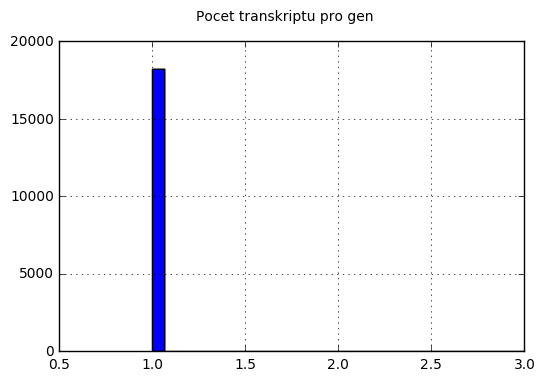

In [15]:
transkripti["Pocet transkriptu"].hist(bins=30)
pl.suptitle("Pocet transkriptu pro gen")

In [29]:
!awk -F "\t" '$3 == "transcript" { print $9 }' klokan.gtf | tr -d ";\"" | awk -F " " '$1 == "gene_id" { print $0}' | wc -l

18310


- Zjistil jsem, že pro každý transkript existuje unikátní ID genu. Respektive přesněji, že žádné dva transkripty nemají stejné ID genu. Zajímalo mne tedy, kolik je celkem různých ID genu. To jsem zjistil následovně (jelikož jsem již věděl, že žádné dva řádky nejsou identické). Dospěl jsem k závěru, že v genomu existuje 18 310 identických ID genu, což přesně odpovídá počtu transkriptů

- Dále mne tedy zajímalo, jak bude situace vypadat, provedu.li stejnou analýzu, ale namísto s ID genu s názvem genů

In [16]:
!awk -F "\t" '$3 == "transcript" { print $9 }' klokan.gtf | tr -d ";\"" | awk -F " " '$9 == "gene_name" {gene_counter[$10] += 1} END {    for (gene_name in gene_counter){ print gene_name, gene_counter[gene_name]}}' >> transkripts_by_gene.txt

In [4]:
transkriptove=pd.read_table('transkripts_by_gene.txt', header=None, sep=" ")
transkriptove.columns = ["Gen", "Pocet transkriptu" ]
transkriptove.head()

,Gen,Pocet transkriptu
0,CAPN6,1
1,CAPN7,1
2,DACH1,1
3,LARS,1
4,CAPN8,1


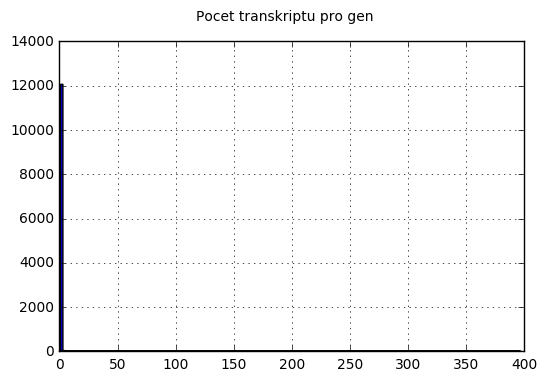

In [16]:
transkriptove["Pocet transkriptu"].hist(bins=3000, width = 2)
pl.suptitle("Pocet transkriptu pro gen")

Opět jsem zpočítal, kolik mám jednotlivých unikátních názvů genů

In [15]:
!awk -F "\t" '$3 == "transcript" { print $9 }' klokan.gtf | tr -d ";\"" | awk -F " " '$9 == "gene_name" { print $0}' | wc -l

12972


A zjistil jsem, že jich je tentokrát podstatně méňe, než kolik je transkriptů. Z histogramu by se zdálo, že opět všeny transkripty přísluší jednomu genu. Nicméně mi přišlo divné, že je tentokrát měřítko na ose x až do 400. Nechal jsem si tedy spočítat, kolik přísluší jednotlivým názvům genů transkriptů a zobrazil si to v tabulce.

In [14]:
!awk -F " " ' {gene_counter[$2] += 1} END {    for (gene_name in gene_counter){ print gene_name, gene_counter[gene_name]}}' transkripts_by_gene.txt >> name_gene.txt

In [19]:
tran=pd.read_table('name_gene.txt', header=None, sep=" ")
tran.columns = ["Pocet transkriptru pro gen", "Cetnost"]
tran

,Pocet transkriptru pro gen,Cetnost
0,1,12065
1,2,76
2,3,14
3,4,6
4,5,1
5,7,2
6,8,1
7,9,1
8,26,1
9,32,1


Zajímalo mne, které geny to jsou, které mají více než 10 transkriptů.

In [22]:
transkriptove.loc[transkriptove["Pocet transkriptu"]  > 10].sort_values(["Pocet transkriptu"], ascending=True)

,Gen,Pocet transkriptu
8971,U1,26
1746,7SK,32
1769,U6atac,58
5716,5S_rRNA,142
8980,U6,395


## Rozdělení genů podle jejich typu
- to znamená na protein-kodující, kodující různé RNA a pseudogeny.

<br>
<p>
Já jsem to udělal pomocí <i>awk</i>. Vybral jsem z původního souboru řádky které měly ve třetím slopečku "gene". A u těchto řádků jsem vybral pouze devátý sloupec. Odstanil jsem středníky mezi jednotlivými slopci, abych neměl typ informace a informaci v jednom sloupci, ale rozdělil si to tak na dva sloupce. Potom jsem vzal data z nově vzniklého slopce 7, 8 a 9 a pokud jejich hodnota byla "gene_biotype", tak jsem do  promněné counter přičetl +1. Nakonci jsem do souboru vytisklnul druhy genů a jejich počet. Důvod proč jsem procházel sloupce 7, 8 a 9 byl, že data nebyla konzistentní a informace o typu genu se nacházela v jednom z těchto tří sloupců.
</p>

<p>
Data jsem zde pak zobrazil do tabulky a pro větší přehlednost také do grafu.
</p>

In [23]:
!awk -F "\t" '$3 == "gene" { print $9 }' klokan.gtf | tr -d ";\"" | awk -F " " '$9 == "gene_biotype" {gene_counter[$10] += 1} END {    for (gene_name in gene_counter){ print gene_name, gene_counter[gene_name]}}' > genes_by_feature.txt
!awk -F "\t" '$3 == "gene" { print $9 }' klokan.gtf | tr -d ";\"" | awk -F " " '$7 == "gene_biotype" {gene_counter[$8] += 1} END {    for (gene_name in gene_counter){ print gene_name, gene_counter[gene_name]}}' >> genes_by_feature.txt
!awk -F "\t" '$3 == "gene" { print $9 }' klokan.gtf | tr -d ";\"" | awk -F " " '$8 == "gene_biotype" {gene_counter[$9] += 1} END {    for (gene_name in gene_counter){ print gene_name, gene_counter[gene_name]}}' >> genes_by_feature.txt


Tabulka, ze které jsem vlastně vybíral, po provedení prvního awk vypadala následovně. V závislosti na množství atributů u kterého daného řádku, jsem počítal typ genů v 8, 9 či 10 sloupci, jak jsem vysvětloval výše.

In [1]:
!awk -F "\t" '$3 == "gene" { print $9 }' klokan.gtf | tr -d ";\"" | head 

gene_id ENSMEUG00000010374 gene_version 1 gene_name DMD gene_source ensembl gene_biotype protein_coding
gene_id ENSMEUG00000010436 gene_version 1 gene_source ensembl gene_biotype pseudogene
gene_id ENSMEUG00000015434 gene_version 1 gene_name CSMD3 gene_source ensembl gene_biotype protein_coding
gene_id ENSMEUG00000008627 gene_version 1 gene_name USH2A gene_source ensembl gene_biotype protein_coding
gene_id ENSMEUG00000017169 gene_version 1 gene_name 5S_rRNA gene_source ensembl gene_biotype rRNA
gene_id ENSMEUG00000005000 gene_version 1 gene_name LRP1B gene_source ensembl gene_biotype protein_coding
gene_id ENSMEUG00000001674 gene_version 1 gene_name RYR2 gene_source ensembl gene_biotype protein_coding
gene_id ENSMEUG00000016320 gene_version 1 gene_name RYR3 gene_source ensembl gene_biotype protein_coding
gene_id ENSMEUG00000008795 gene_version 1 gene_name CSMD2 gene_source ensembl gene_biotype protein_coding
gene_id ENSMEUG00000003558 gene_version 1 gene_name DOCK1 gene_source ensembl 

In [17]:
%matplotlib inline
geny=pd.read_table('genes_by_feature.txt', header=None, )
geny.columns = ["Gen", "Pocet genu" ]
geny

,Gen,Pocet genu
0,misc_RNA,42
1,rRNA,144
2,snoRNA,254
3,protein_coding,15290
4,snRNA,507
5,pseudogene,1496
6,miRNA,525


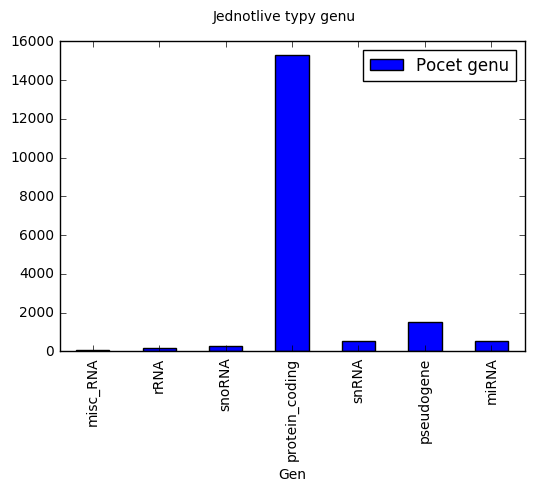

In [18]:
import matplotlib.pyplot as plt

my_plot = geny.plot("Gen", "Pocet genu", kind="bar" )
pl.suptitle("Jednotlive typy genu")

## Zastoupení genů dle růrného počtu exonů

Pomoci awk jsem vytvořil soubor s jednotlivými protein kodujícími geny a četností kolik mají exonů.

In [57]:
!awk -F "\t" '$3 == "exon" { print $9 }' klokan.gtf | tr -d ";\"" | awk -F " " '$16 == "protein_coding" {gene_counter[$12] += 1} END {    for (gene_name in gene_counter){ print gene_name, gene_counter[gene_name]}}' > number_of_exons_by_gene.txt

In [8]:
exony=pd.read_table('number_of_exons_by_gene.txt', header=None, sep=" ")
exony.columns = ["Gen", "Pocet exonu" ]
exony.head()

,Gen,Pocet exonu
0,CAPN6,20
1,CAPN7,18
2,DACH1,19
3,LARS,38
4,CAPN8,23


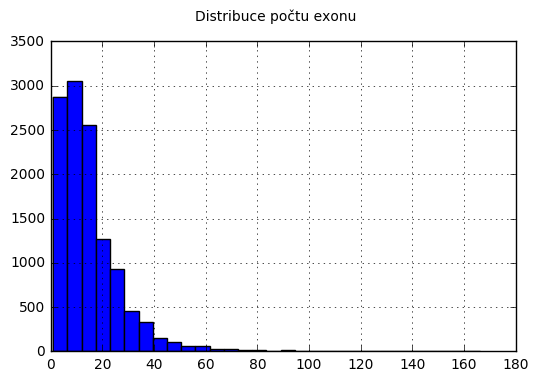

In [22]:
exony["Pocet genu"].hist(bins=30)
pl.suptitle("Distribuce počtu exonu")

## Počet genů na + a - řetězci
- spočítel jsem počet genů na + a - řetězci pomocí příkazu awk
- zároveň mě zajímalo, zda-li se bude lišit distribuce v počtu genů majících určitý počet exonů. Analýzu jsem udělal analogicky k analýze počtu genů s daným počtem exonů bez ohledu na orientaci řetězce.

In [1]:
!awk -F "\t" '$3 == "gene" { print $0 }' klokan.gtf   |  awk -F "\t" '$7 == "+" { print $0 }'  | wc -l
!awk -F "\t" '$3 == "gene" { print $0 }' klokan.gtf   |  awk -F "\t" '$7 == "-" { print $0 }'  | wc -l

9177
9081


In [2]:
!awk -F "\t" '$3 == "exon" { print $0 }' klokan.gtf | awk -F "\t" '$7 == "+" { print $9 }' | tr -d ";\"" | awk -F " " '$16 == "protein_coding" {gene_counter[$12] += 1} END {    for (gene_name in gene_counter){ print gene_name, gene_counter[gene_name]}}' > exons_plus.txt
!awk -F "\t" '$3 == "exon" { print $0 }' klokan.gtf | awk -F "\t" '$7 == "-" { print $9 }' | tr -d ";\"" | awk -F " " '$16 == "protein_coding" {gene_counter[$12] += 1} END {    for (gene_name in gene_counter){ print gene_name, gene_counter[gene_name]}}' > exons_minus.txt

In [9]:
exony_plus=pd.read_table('exons_plus.txt', header=None, sep=" ")
exony_plus.columns = ["Gen", "Pocet exonu na + retezci" ]
exony_plus.head()

,Gen,Pocet exonu na + retezci
0,CAPN7,18
1,DACH2,17
2,AVL9,15
3,CAPN9,21
4,LTBP1,41


In [10]:
exony_minus=pd.read_table('exons_minus.txt', header=None, sep=" ")
exony_minus.columns = ["Gen", "Pocet exonu na - retezci" ]
exony_minus.head()

,Gen,Pocet exonu na - retezci
0,CAPN6,20
1,DACH1,19
2,CAPN8,23
3,LARS,38
4,NEB,166


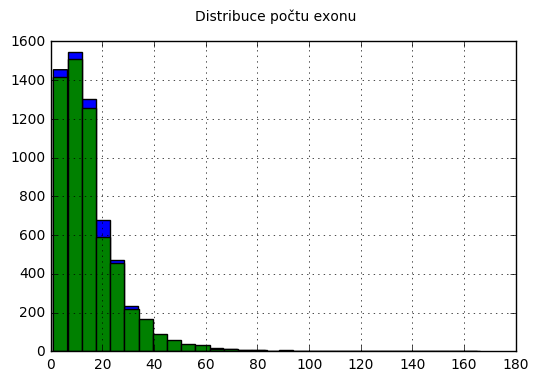

In [11]:
exony_plus["Pocet exonu na + retezci"].hist(bins=30)
pl.suptitle("Distribuce počtu exonu")

exony_minus["Pocet exonu na - retezci"].hist(bins=30)
pl.suptitle("Distribuce počtu exonu")

Dále mne napadlo zjistit velikost genů a jednotlivých exonů a jejich distribuci.

In [38]:
genes["Velikost_genu"] = genes["Konec"]-genes["Start"]

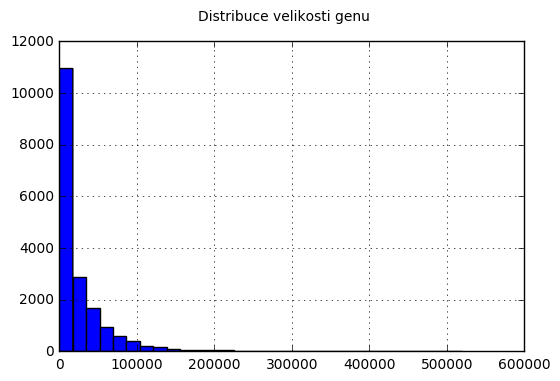

In [34]:
genes["Velikost_genu"].hist(bins=30)
pl.suptitle("Distribuce velikosti genu")

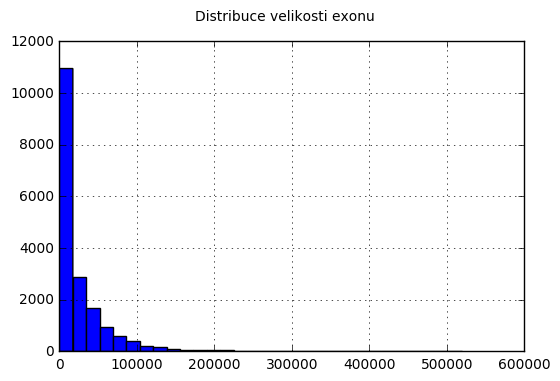

In [40]:
exons.columns = ["Chromozom", "Zdroj", "Druh", "Start", "Konec", "score", "Retezec", "frame", "Informace"]
genes["Velikost_genu"] = genes["Konec"]-genes["Start"]
genes["Velikost_genu"].hist(bins=30)
pl.suptitle("Distribuce velikosti exonu")

![Klokan](https://www.zoochat.com/community/media/tammar-wallaby-macropus-eugenii-at-tierpark-gettorf-2007.8585/full?d=0)

# <center>Děkuji za pozornost</center>